# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.092949e+01     7.144394e+00
 * time: 0.0018329620361328125
     1     3.039245e+01     4.509089e+00
 * time: 0.007828950881958008
     2     2.078743e+01     4.382530e+00
 * time: 0.014898061752319336
     3     1.507186e+01     3.588408e+00
 * time: 0.02097296714782715
     4     1.200423e+01     1.828797e+00
 * time: 0.027698993682861328
     5     1.147697e+01     2.192761e+00
 * time: 0.034364938735961914
     6     1.056654e+01     1.398145e+00
 * time: 0.039016008377075195
     7     9.477255e+00     1.622747e+00
 * time: 0.0434720516204834
     8     8.929882e+00     1.568717e+00
 * time: 0.047866106033325195
     9     8.678980e+00     1.114768e+00
 * time: 0.05199003219604492
    10     8.465320e+00     1.062911e+00
 * time: 0.055989980697631836
    11     8.287403e+00     1.022523e+00
 * time: 0.06016397476196289
    12     8.123438e+00     6.219178e-01
 * time: 0.06507611274719238
    13     8.016256e+00     4.476339e-01


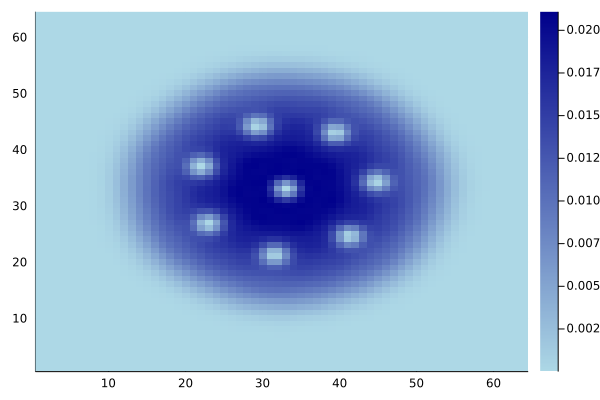

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)